# **Прогноз оттока клиентов для оператора связи.**  
  Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

## План работы.  

### 1. [Загрузка данных и получение общей информации о них.](#1)  
  
  
### 2. [Предобработка данных.](#2)  


### 3. [Подготовка признаков](#3)  

 
### 4. [Построение  и выбор модели.](#4) 
   
  
### 5. [Тестирование модели.](#5)  
   
  
### 6. [Выводы о проделанной работе.](#6)

<a id='1'></a> 
### 1. Загрузка данных и получение общей информации о них.

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import IntProgress
import warnings
warnings.filterwarnings('ignore')

#### Загрузим предоставленные данные и посмотрим общую информацию о них:</font>

In [54]:
# информация о договоре:
contract_df = pd.read_csv('/datasets/final_provider/contract.csv')
print(contract_df.info())
contract_df.head(7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
customerID          7043 non-null object
BeginDate           7043 non-null object
EndDate             7043 non-null object
Type                7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
None


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
5,9305-CDSKC,2019-03-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,99.65,820.5
6,1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4


In [55]:
# персональные данные клиента:
personal_df = pd.read_csv('/datasets/final_provider/personal.csv')
print(personal_df.info())
personal_df.head(7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
customerID       7043 non-null object
gender           7043 non-null object
SeniorCitizen    7043 non-null int64
Partner          7043 non-null object
Dependents       7043 non-null object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB
None


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
5,9305-CDSKC,Female,0,No,No
6,1452-KIOVK,Male,0,No,Yes


In [56]:
# информация об интернет-услугах:
internet_df = pd.read_csv('/datasets/final_provider/internet.csv')
print(internet_df.info())
internet_df.head(7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
customerID          5517 non-null object
InternetService     5517 non-null object
OnlineSecurity      5517 non-null object
OnlineBackup        5517 non-null object
DeviceProtection    5517 non-null object
TechSupport         5517 non-null object
StreamingTV         5517 non-null object
StreamingMovies     5517 non-null object
dtypes: object(8)
memory usage: 344.9+ KB
None


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No
5,9305-CDSKC,Fiber optic,No,No,Yes,No,Yes,Yes
6,1452-KIOVK,Fiber optic,No,Yes,No,No,Yes,No


In [57]:
# информация об услугах телефонии:
phone_df = pd.read_csv('/datasets/final_provider/phone.csv')
print(phone_df.info())
phone_df.head(7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
customerID       6361 non-null object
MultipleLines    6361 non-null object
dtypes: object(2)
memory usage: 99.5+ KB
None


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes
5,7892-POOKP,Yes
6,6388-TABGU,No


#### Вывод. 

 Загружены данные из 4 файлов в 4 таблицы(`contract_df`, `personal_df`, `internet_df`, `phone_df`). Методами `info()` и `head()` получена общая информация о данных и выведены первые 5 строк каждой таблицы. Видим, что количество данных по интернету и телефонии(таблицы `internet_df` и `phone_df`) меньше. Названия столбцов не в нижнем регистре. Столбец `TotalCharges` c cуммарными платами клиентов имеет тип данных object. Столбцы с датами также имеют тип данных object.</font>


<a id='2'></a> 
### 2. Предобработка данных.

Объединим все таблицы в одну по столбцу `customerID` содержащий код клиента:

In [58]:
full_df = pd.merge(contract_df, personal_df, how ='outer', on ='customerID')\
            .merge(internet_df, how ='outer', on ='customerID').merge(phone_df, how ='outer', on ='customerID')

full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
customerID          7043 non-null object
BeginDate           7043 non-null object
EndDate             7043 non-null object
Type                7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
InternetService     5517 non-null object
OnlineSecurity      5517 non-null object
OnlineBackup        5517 non-null object
DeviceProtection    5517 non-null object
TechSupport         5517 non-null object
StreamingTV         5517 non-null object
StreamingMovies     5517 non-null object
MultipleLines       6361 non-null object
dtypes: float64(1), int64(1), object(18)
memory usage: 1.1+ MB


Приведём к нижнему регистру названия столбцов:

In [59]:
full_df.columns = ['customer_id', 'begin_date', 'end_date', 'type', 'paperless_billing', 'payment_method',
                    'monthly_charges', 'total_charges', 'gender', 'senior_citizen', 'partner', 'dependents',
                    'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support',
                    'streaming_tv', 'streaming_movies', 'multiple_lines']

full_df.head(2)

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No


Просмотрим уникальные значения:

In [60]:
for column in full_df.columns:
    print(full_df[column].value_counts())
    print('------------------------------')

1428-GTBJJ    1
6305-YLBMM    1
5386-THSLQ    1
8901-HJXTF    1
3797-VTIDR    1
             ..
6402-ZFPPI    1
7892-QVYKW    1
2928-HLDBA    1
5177-RVZNU    1
2077-MPJQO    1
Name: customer_id, Length: 7043, dtype: int64
------------------------------
2014-02-01    366
2019-10-01    237
2019-11-01    237
2019-09-01    237
2020-01-01    233
             ... 
2020-02-01     11
2014-01-01      7
2013-12-01      3
2013-10-01      3
2013-11-01      2
Name: begin_date, Length: 77, dtype: int64
------------------------------
No                     5174
2019-11-01 00:00:00     485
2019-12-01 00:00:00     466
2020-01-01 00:00:00     460
2019-10-01 00:00:00     458
Name: end_date, dtype: int64
------------------------------
Month-to-month    3875
Two year          1695
One year          1473
Name: type, dtype: int64
------------------------------
Yes    4171
No     2872
Name: paperless_billing, dtype: int64
------------------------------
Electronic check             2365
Mailed check           

В сроках окончания договора только последние 5 месяцев.
В столбце `total_charges` с общей суммой найдено 11 пустых значений ' '. Выведем эти значения на экран:

In [61]:
full_df[full_df['total_charges'] == ' ']


,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,,Female,0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,No,NaN
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,,Male,0,No,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,,Female,0,Yes,Yes,DSL,Yes,Yes,Yes,No,Yes,Yes,No
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,,Male,0,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,,Female,0,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,No,NaN
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,,Male,0,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,,Male,0,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,,Female,0,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,,Male,0,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,,Female,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Yes


Видим, что во всех строках с пустыми значениями  дата начала договора это дата выгрузки данных, и срок договора 2 года. Поэтому можем заполнить эти пустоты значениями из столбца `monthly_charges`. Также приведём данные в столбце `total_charges` к типу float64:

In [62]:
full_df['total_charges'] = full_df['total_charges'].replace(' ', full_df['monthly_charges'])
full_df['total_charges'] = pd.to_numeric(full_df['total_charges'])

 После объединения возникли пропуски по причине неполных данных в 2 таблицах. Это связано с тем, что у части клиентов осутствуют интернет услуги, у других клиентов осутствует телефония. Соответственно заполним эти пропуски значением`'No'` .

In [63]:
df = full_df.copy().fillna('No')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
customer_id          7043 non-null object
begin_date           7043 non-null object
end_date             7043 non-null object
type                 7043 non-null object
paperless_billing    7043 non-null object
payment_method       7043 non-null object
monthly_charges      7043 non-null float64
total_charges        7043 non-null float64
gender               7043 non-null object
senior_citizen       7043 non-null int64
partner              7043 non-null object
dependents           7043 non-null object
internet_service     7043 non-null object
online_security      7043 non-null object
online_backup        7043 non-null object
device_protection    7043 non-null object
tech_support         7043 non-null object
streaming_tv         7043 non-null object
streaming_movies     7043 non-null object
multiple_lines       7043 non-null object
dtypes: float64(2), int64(1), object(17)
memory usag

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,No
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.50,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,No
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


#### Вывод. 

Данные объединены в одну таблицу. Названия столбцов приведены к нижнему регистру. обнаружены и удалены строки с пустыми значениями в `total_charges`. Возникшие после объединения таблиц пропуски заполнены значением `'No'`.

<a id='3'></a> 
### 3. Подготовка признаков.

Создадим новый признак `customer_lifetime`, который отражает время "жизни" абонента в данной компании. Для этого создадим функцию `customer_life()`, которая на вход принимает таблицу, возвращает разницу в днях между началом действия договора услуг и его окончанием. Если в договор действующий, возвращается количество дней между началом действия договора и датой выгрузки данных(2020-02-01). Применим эту функцию и создадим новый признак:

In [64]:
def customer_life(data):
    if data['end_date'] == 'No':
        return (pd.to_datetime('2020-02-01 00:00:00') - pd.to_datetime(data['begin_date'])).days
    else:
        return (pd.to_datetime(data['end_date']) - pd.to_datetime(data['begin_date'])).days
    
df['customer_lifetime'] = df.apply(customer_life, axis=1)   
df.head()    

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,...,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,customer_lifetime
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,...,No,DSL,No,Yes,No,No,No,No,No,31
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.50,Male,0,...,No,DSL,Yes,No,Yes,No,No,No,No,1036
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,...,No,DSL,Yes,Yes,No,No,No,No,No,61
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,...,No,DSL,Yes,No,Yes,Yes,No,No,No,1371
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,...,No,Fiber optic,No,No,No,No,No,No,No,61


Так как в данных отсутствует целевой признак, выделим его из `end_date` - датой окончания действия договора. Для этого создадим функцию `to_target()`, которая при наличии даты в `end_date` возвращает класс 1, если дата отсутствует - класс 0. Таким образом получим  бинарную классификацию, где 1 означает, что клиент покинул компанию,а 0 - клиент остался. Применим эту функцию и создадим целевой признак `target`:

In [65]:
def to_target(date):
    if date != 'No':
        return 1
    else: 
        return 0

df['target'] = df['end_date'].apply(to_target)   
df.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,...,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,customer_lifetime,target
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,...,DSL,No,Yes,No,No,No,No,No,31,0
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.50,Male,0,...,DSL,Yes,No,Yes,No,No,No,No,1036,0
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,...,DSL,Yes,Yes,No,No,No,No,No,61,1
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,...,DSL,Yes,No,Yes,Yes,No,No,No,1371,0
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,...,Fiber optic,No,No,No,No,No,No,No,61,1



Посмотрим как связаны между собой численные признаки:

In [66]:
df.corr()

,monthly_charges,total_charges,senior_citizen,customer_lifetime,target
monthly_charges,1.000000,0.651182,0.220173,0.247754,0.193356
total_charges,0.651182,1.000000,0.102997,0.826095,-0.198347
senior_citizen,0.220173,0.102997,1.000000,0.016514,0.150889
customer_lifetime,0.247754,0.826095,0.016514,1.000000,-0.352673
target,0.193356,-0.198347,0.150889,-0.352673,1.000000


Заметна сильная корреляция между `customer_lifetime` и `total_charges`, также между `monthly_charges` и `total_charges`. Значит присутствует мультиколлинеарность, что может стать причиной переобучаемости модели. Также избыточные коэффициенты увеличивают сложность модели машинного обучения, а значит, время ее тренировки возрастает. Поэтому в дальнейшем исключим из модели `total_charges` и `monthly_charges`.

In [67]:
df[df['end_date'] == 'No']['end_date'].count() / df[df['end_date'] != 'No']['end_date'].count()

2.7683253076511503

Сначала выделим валидационную и тестовую выборки. Оставшиеся данные увеличим в 2 раза для лучшего обучения и перемешаем. Оставим только необходимые признаки:

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

In [69]:
# тестовая выборка:
data, df_test = train_test_split(df, test_size=0.2, random_state=12345)
features_test = df_test.drop(['customer_id', 'begin_date', 'end_date', 'monthly_charges', 'total_charges', 
                  'target'], axis=1)
targets_test = df_test.target

# валидационная и обучающая выборки:
train, df_valid = train_test_split(data, test_size=0.25, random_state=12345)
features_valid = df_valid.drop(['customer_id', 'begin_date', 'end_date', 'monthly_charges', 'total_charges', 
                  'target'], axis=1) 
targets_valid = df_valid.target

# увеличиваем и перемешиваем обучающую выборку:
df_train = shuffle(pd.concat([train, train]).reset_index(drop=True), random_state=12345).reset_index(drop=True)

features_train = df_train.drop(['customer_id', 'begin_date', 'end_date', 'monthly_charges', 'total_charges', 
                  'target'], axis=1)
targets_train = df_train.target


df_train.shape

(8450, 22)

Произведём масштабирование признаков:

In [70]:
numeric = ['customer_lifetime']

scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

In [71]:
features_train.head()

,type,paperless_billing,payment_method,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,customer_lifetime
0,Two year,No,Mailed check,Female,0,Yes,No,DSL,Yes,Yes,Yes,No,No,No,Yes,1.413766
1,One year,No,Credit card (automatic),Male,0,Yes,No,Fiber optic,No,Yes,No,No,Yes,Yes,Yes,0.958049
2,Month-to-month,No,Electronic check,Male,0,No,No,DSL,No,No,No,No,No,Yes,No,-1.173572
3,Two year,No,Credit card (automatic),Female,1,No,No,Fiber optic,Yes,No,Yes,Yes,No,Yes,Yes,1.003891
4,Month-to-month,Yes,Bank transfer (automatic),Male,0,No,No,Fiber optic,No,Yes,Yes,Yes,No,Yes,No,-0.433369


#### Вывод.  
При помощи созданной функции `customer_lifetime` добавлен новый признак времени "жизни" абонента в данной компании. Выделен целевой признак из даты окончания договора, в результате получена бинарная классификация: 1- абонент покинул компанию, 0 - не покинул. Также данные масштабированы и разделены на обучающую, валидационную и тестовую выборки. Обучающая выборка увеличена в 2 раза.

<a id='4'></a> 
### 4. Построение и выбор модели.

Используем модели **CatBoostClassifier** и **LGBMClassifier**. Для их корректной работы без применения техники ОНЕ выделим категориальные признаки:

In [72]:
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score
import time
from tqdm import tqdm

In [73]:
cat_features = ['type', 'paperless_billing', 'payment_method', 'gender', 'partner', 'dependents',
               'internet_service', 'online_security', 'online_backup', 'device_protection', 
                'tech_support', 'streaming_tv', 'streaming_movies', 'multiple_lines']

Создадим функцию для подбора параметров `learning_rate` и `depth` в модели CatBoostClassifier. Функция печатает лучшие параметры на валидационной выборке для метрики ROC-AUC. Применим эту функцию:

In [74]:
def best_model_cbr(learn_rate, max_depth):
    score_dict = {}
    for rate in tqdm(np.arange(0.1,learn_rate,0.05)):
        for depth in np.arange(2, max_depth, 1):
            model_cbr = CatBoostClassifier(loss_function="CrossEntropy", cat_features=cat_features, iterations = 500,
                                           learning_rate = rate, depth = depth)
            model_cbr.fit(features_train, targets_train, cat_features=cat_features, verbose=0)
            
            probabilities_valid_cbr = model_cbr.predict_proba(features_valid)
            probabilities_one_valid_cbr = probabilities_valid_cbr[:, 1]
            predictions = model_cbr.predict(features_valid)
            roc_auc = roc_auc_score(targets_valid, probabilities_one_valid_cbr)
            accuracy = accuracy_score(targets_valid, predictions)

            score_dict[roc_auc] = ['learning_rate: {}, depth: {}'.format(rate, depth),
                                  'ROC-AUC валидационной выборки:{}'.format(roc_auc),
                                  'Accuracy валидационной выборки:{}'.format(accuracy)]
    print('Лучшие параметры для CatBoostClassifier:')        
    print(score_dict[max(score_dict)][0]) 
    print(score_dict[max(score_dict)][1])
    print(score_dict[max(score_dict)][2])
    
best_model_cbr(0.5, 5)    

100%|██████████| 8/8 [07:23<00:00, 55.45s/it]

Лучшие параметры для CatBoostClassifier:
learning_rate: 0.40000000000000013, depth: 2
ROC-AUC валидационной выборки:0.949138606318139
Accuracy валидационной выборки:0.9020581973030518


Для корректной работы модели LGBMClassifier приведем категориальные признаки к типу данных `category`:


In [75]:
features_train[cat_features] = features_train[cat_features].astype('category')
features_valid[cat_features] = features_valid[cat_features].astype('category')
features_test[cat_features] = features_test[cat_features].astype('category')

Также создадим функцию для подбора параметров `learning_rate` и `max_depth` в LGBMClassifier. Функция напечатает лучшие параметры на валидационной выборке для метрики ROC-AUC:

In [76]:
def best_model_lgb(learn_rate, max_depth):
    score_dict = {}
    for rate in tqdm(np.arange(0.1, learn_rate, 0.05)):
        for depth in np.arange(2,max_depth,1):
            model_lgb = LGBMClassifier(categoryorical_features=cat_features, n_estimators = 200,
                                       learning_rate = rate, max_depth = depth, random_state = 12345,
                                       verbose = 0, objective = "binary")
            model_lgb.fit(features_train, targets_train)
            probabilities_valid_lgb = model_lgb.predict_proba(features_valid)
            probabilities_one_valid_lgb = probabilities_valid_lgb[:, 1]
            predictions = model_lgb.predict(features_valid)
            roc_auc = roc_auc_score(targets_valid, probabilities_one_valid_lgb)
            accuracy = accuracy_score(targets_valid, predictions)

            score_dict[roc_auc] = ['learning_rate: {}, depth: {}'.format(rate, depth),
                                  'ROC-AUC валидационной выборки:{}'.format(roc_auc),
                                  'Accuracy валидационной выборки:{}'.format(accuracy)]
            
    print('Лучшие параметры для LGBMRegressor:')        
    print(score_dict[max(score_dict)][0]) 
    print(score_dict[max(score_dict)][1])
    print(score_dict[max(score_dict)][2]) 
    
best_model_lgb(0.5, 5)    

100%|██████████| 8/8 [21:42<00:00, 162.77s/it]

Лучшие параметры для LGBMRegressor:
learning_rate: 0.40000000000000013, depth: 3
ROC-AUC валидационной выборки:0.927059189630011
Accuracy валидационной выборки:0.8708303761533002


#### Вывод.  
Лучшей моделью на валидационной выборке оказалась **CatBoostClassifier**. С параметрами learning_rate = 0.4 и depth = 2  ROC-AUC валидационной выборки = 0.949, аccuracy валидационной выборки:0.902. Модель **LGBMClassifier** работает быстрее, но даёт чуть худший результат. Для тестовой выборки оставим **CatBoostClassifier**

<a id='5'></a> 
### 5. Тестирование модели.

Проверим выбранную модель на тестовой выборке:

In [77]:
model_cbr = CatBoostClassifier(loss_function="Logloss", cat_features=cat_features, iterations = 500,
                                     learning_rate = 0.4, depth = 2)
model_cbr.fit(features_train, targets_train, cat_features=cat_features, verbose=0)
        
probabilities_test_cbr = model_cbr.predict_proba(features_test)
probabilities_one_test_cbr = probabilities_test_cbr[:, 1]
predictions = model_cbr.predict(features_test)
print('ROC-AUC:', roc_auc_score(targets_test, probabilities_one_test_cbr).round(3))
print('Accuracy:', accuracy_score(targets_test, predictions).round(3))

ROC-AUC: 0.948
Accuracy: 0.896


Посмотрим на рейтинг факторов по силе влияния на целевой признак. Для этого используем метод `feature_importances_` модели. Выведем результаты на график:

In [78]:
importances = model_cbr.feature_importances_

feature_list = list(features_train.columns)

feature_results = pd.DataFrame({'feature': feature_list,'importance': importances})

feature_results = feature_results.sort_values('importance',ascending = False).reset_index(drop=True)

feature_results.head(10)

,feature,importance
0,customer_lifetime,81.881717
1,type,6.708476
2,internet_service,5.860629
3,payment_method,1.111272
4,streaming_movies,0.890550
5,paperless_billing,0.594186
6,online_security,0.447603
7,streaming_tv,0.427561
8,senior_citizen,0.371678
9,device_protection,0.351046


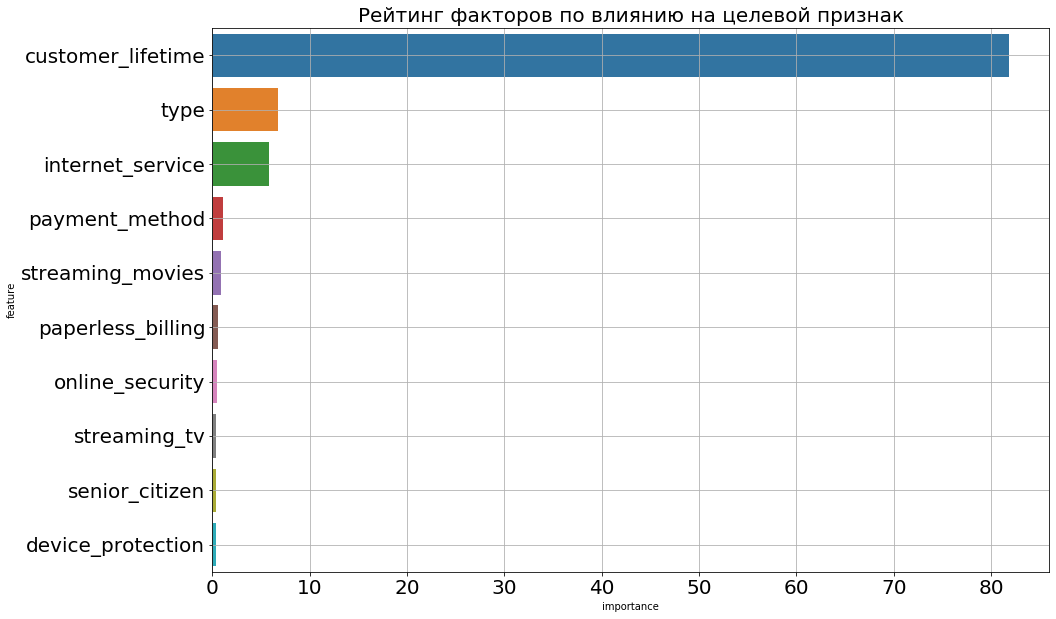

In [79]:
plt.figure(figsize=(15,10))
sns.barplot(x='importance', y='feature',  data=feature_results.head(10))
plt.title('Рейтинг факторов по влиянию на целевой признак', size=20)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.grid(True)

#### Вывод.  
После проверки модели на тестовой выборке ROC-AUC = 0.948, аccuracy = 0.896. Важнейшим фактором по влиянию на целевой признак оказался фактор `customer_lifetime` - время "жизни" абонента. Также заметное влияние имеют тип договора и способ подключения интернета

<a id='6'></a> 
###  6. Общий вывод.
Для оператора связи «Ниединогоразрыва.ком» разработана модель для предсказания оттока клиентов. Изначально компанией предоставлены данные 4 файлами. Эти данные загружены в 4 таблицы. Проведена предобработка данных: данные объединены в одну таблицу, названия столбцов приведены к нижнему регистру, удалены строки с пустыми значениями, заполнены пропуски. Выявлено, что отток абонентов начался в последние 5 месяцев, что может указывать, например, на появление новых конкурентов с демпинговыми ценами на услуги связи.   
Далее при помощи созданных функций добавлен новый признак времени "жизни" и выделен целевой признак из даты окончания договора.
Также данные масштабированы и разделены на обучающую, валидационную и тестовую выборки.  
Для подбора были выбраны модели **CatBoostClassifier** и **LGBMClassifier**. После подбора параметров с помощью созданных функций, лучший результат на валидационной выборке показала модель **CatBoostClassifier**. В результате на тестовой выборке эта модель выдала **ROC-AUC = 0.948, аccuracy = 0.896**.   
    Также выяснили, что самыми важными факторами по влиянию на целевой признак оказались время "жизни" абонента, тип договора и способ подключения интернета(признаки `customer_lifetime`, `type`, `internet_service`)